## Recurrent Neural Network

Steps for **Stock Price Prediction**

Step 1: Import the Libraries

Step 2: Data Preprocessing
1. Load the Dataset
2. The the values in array
3. Feature scaling
4. Data Structure with 60 timesteps and 1 output
5. ReShape the Input

Step 3: Create and Train the RNN model

step 4: Create the test data in required format and make prediction





In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 1 - Data Preprocessing

In [61]:
df_train = pd.read_csv('/content/drive/MyDrive/Final Projects/RNN (1)/Google_Stock_Price_Train.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [62]:
training_set = df_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Create a Data Structure with 60 timesteps and 1 output

In [64]:
len(training_set)

1258

In [65]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [67]:
y_train[1:10]

array([0.08471612, 0.07454052, 0.07883771, 0.07238262, 0.06663442,
       0.06315574, 0.06782499, 0.06823424, 0.07601012])

# Reshaping the input

In [68]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Part 2 - Building and Training the RNN

In [69]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM

In [70]:
#initializing the RNN
regressor = Sequential()

In [71]:
#Adding the layers
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],1) ))
regressor.add(Dropout(.2))

In [72]:
#Adding remaining LSTM layers
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(.2))

In [73]:
#Add the output layer
regressor.add(Dense(units=1))


In [74]:
#Compile the model
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [75]:
#fit the model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 183ms/step - loss: 0.0288
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0129
Epoch 3/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0111
Epoch 4/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0095
Epoch 5/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0086
Epoch 6/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0093
Epoch 7/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0073
Epoch 8/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0075
Epoch 9/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0072
Epoch 10/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0070
Epoch 11/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0054
Epoch 12/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0062
Epoch 13/100

## Part 3 - Making the predictions and visualising the results
### Getting the real stock price of 2017
  

In [76]:
df_test = pd.read_csv('/content/drive/MyDrive/Final Projects/RNN (1)/Google_Stock_Price_Test.csv')
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [77]:
real_stock_price = df_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [78]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

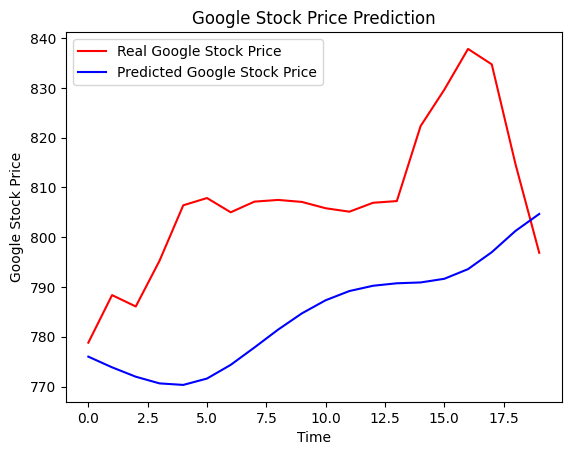

In [79]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [80]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [81]:
rmse

26.27727326936191

In [82]:
regressor.save('/content/drive/MyDrive/Final projects/RNN (1)/network.h5')